Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [6]:
#import all libraries and dependencies for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
sns.set(style = 'darkgrid')


In [4]:
#import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# Reading the automobile consulting company file on which analysis needs to be done
df = pd.read_csv('Carprice.csv')

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.shape

(205, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# cleaning of data

In [14]:
df.sample()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
52,53,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0


In [15]:
#missing values
df.isnull().sum() #no missing values found

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
#droping car_id 
df.drop('car_ID',axis=1,inplace=True)

In [19]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

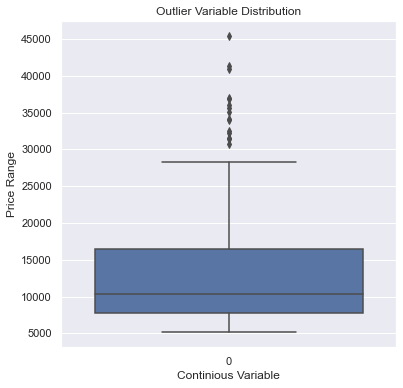

In [31]:
# Outlier Analysis of target variable with maximum amount of Inconsistency
plt.rcParams['figure.figsize'] = [6,6]
sns.boxplot(data=df['price'],orient = "v")
plt.title("Outlier Variable Distribution")
plt.xlabel("Continious Variable")
plt.ylabel("Price Range")
plt.show()


#There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [32]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
# Extracting car company from CarName 
df1 = df.copy()

In [45]:
df['CarCompany'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [47]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Typo Error in Car Company name

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [51]:
df['CarCompany'] = df['CarCompany'].replace({'maxda':'mazda','nissan':'Nissan',
                                             'porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen',
                                            'vw':'volkswagen'})

In [52]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [53]:
df['symboling'] = df['symboling'].astype(str)

In [56]:
# checking for duplicates
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany


In [87]:
# Segregation of Numerical and Categorical Variables/Columns
cate_col = df.select_dtypes(include=['object'])
num_col = df.select_dtypes(exclude=['object'])

# data visualization

In [70]:
df['CarCompany'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

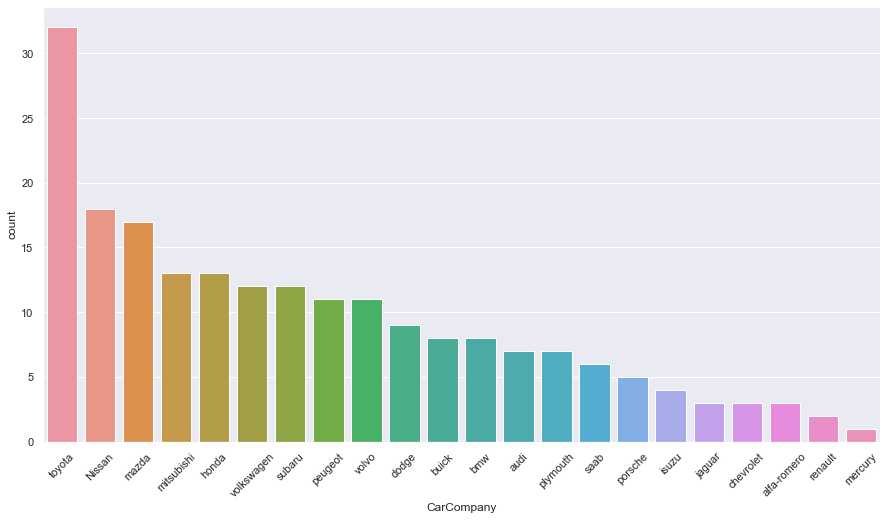

In [74]:
plt.rcParams['figure.figsize'] = [15,8]
sns.countplot(data=df,x='CarCompany',order= df['CarCompany'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Toyota seems to be the most favoured cars.
Mercury seems to be the least favoured cars.

Visualizing the distribution of car prices

C:\Users\Shikha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


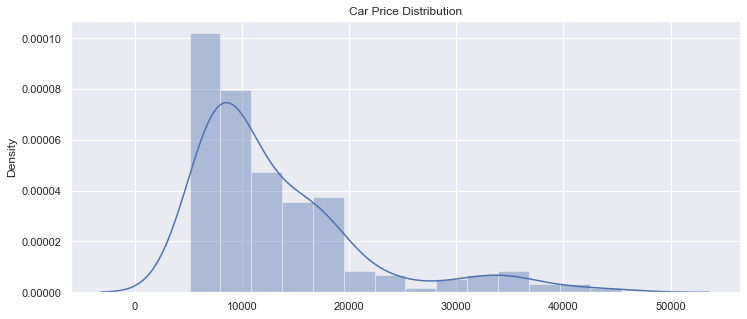

In [91]:
plt.figure(figsize=(12,5))
sns.distplot(x=df['price'])
plt.title('Car Price Distribution')
plt.show()

The plots seems to be right skewed, the prices of almost all cars looks like less than 20000.

#Visualising Numeric Variables
Pairplot of all the numeric variables

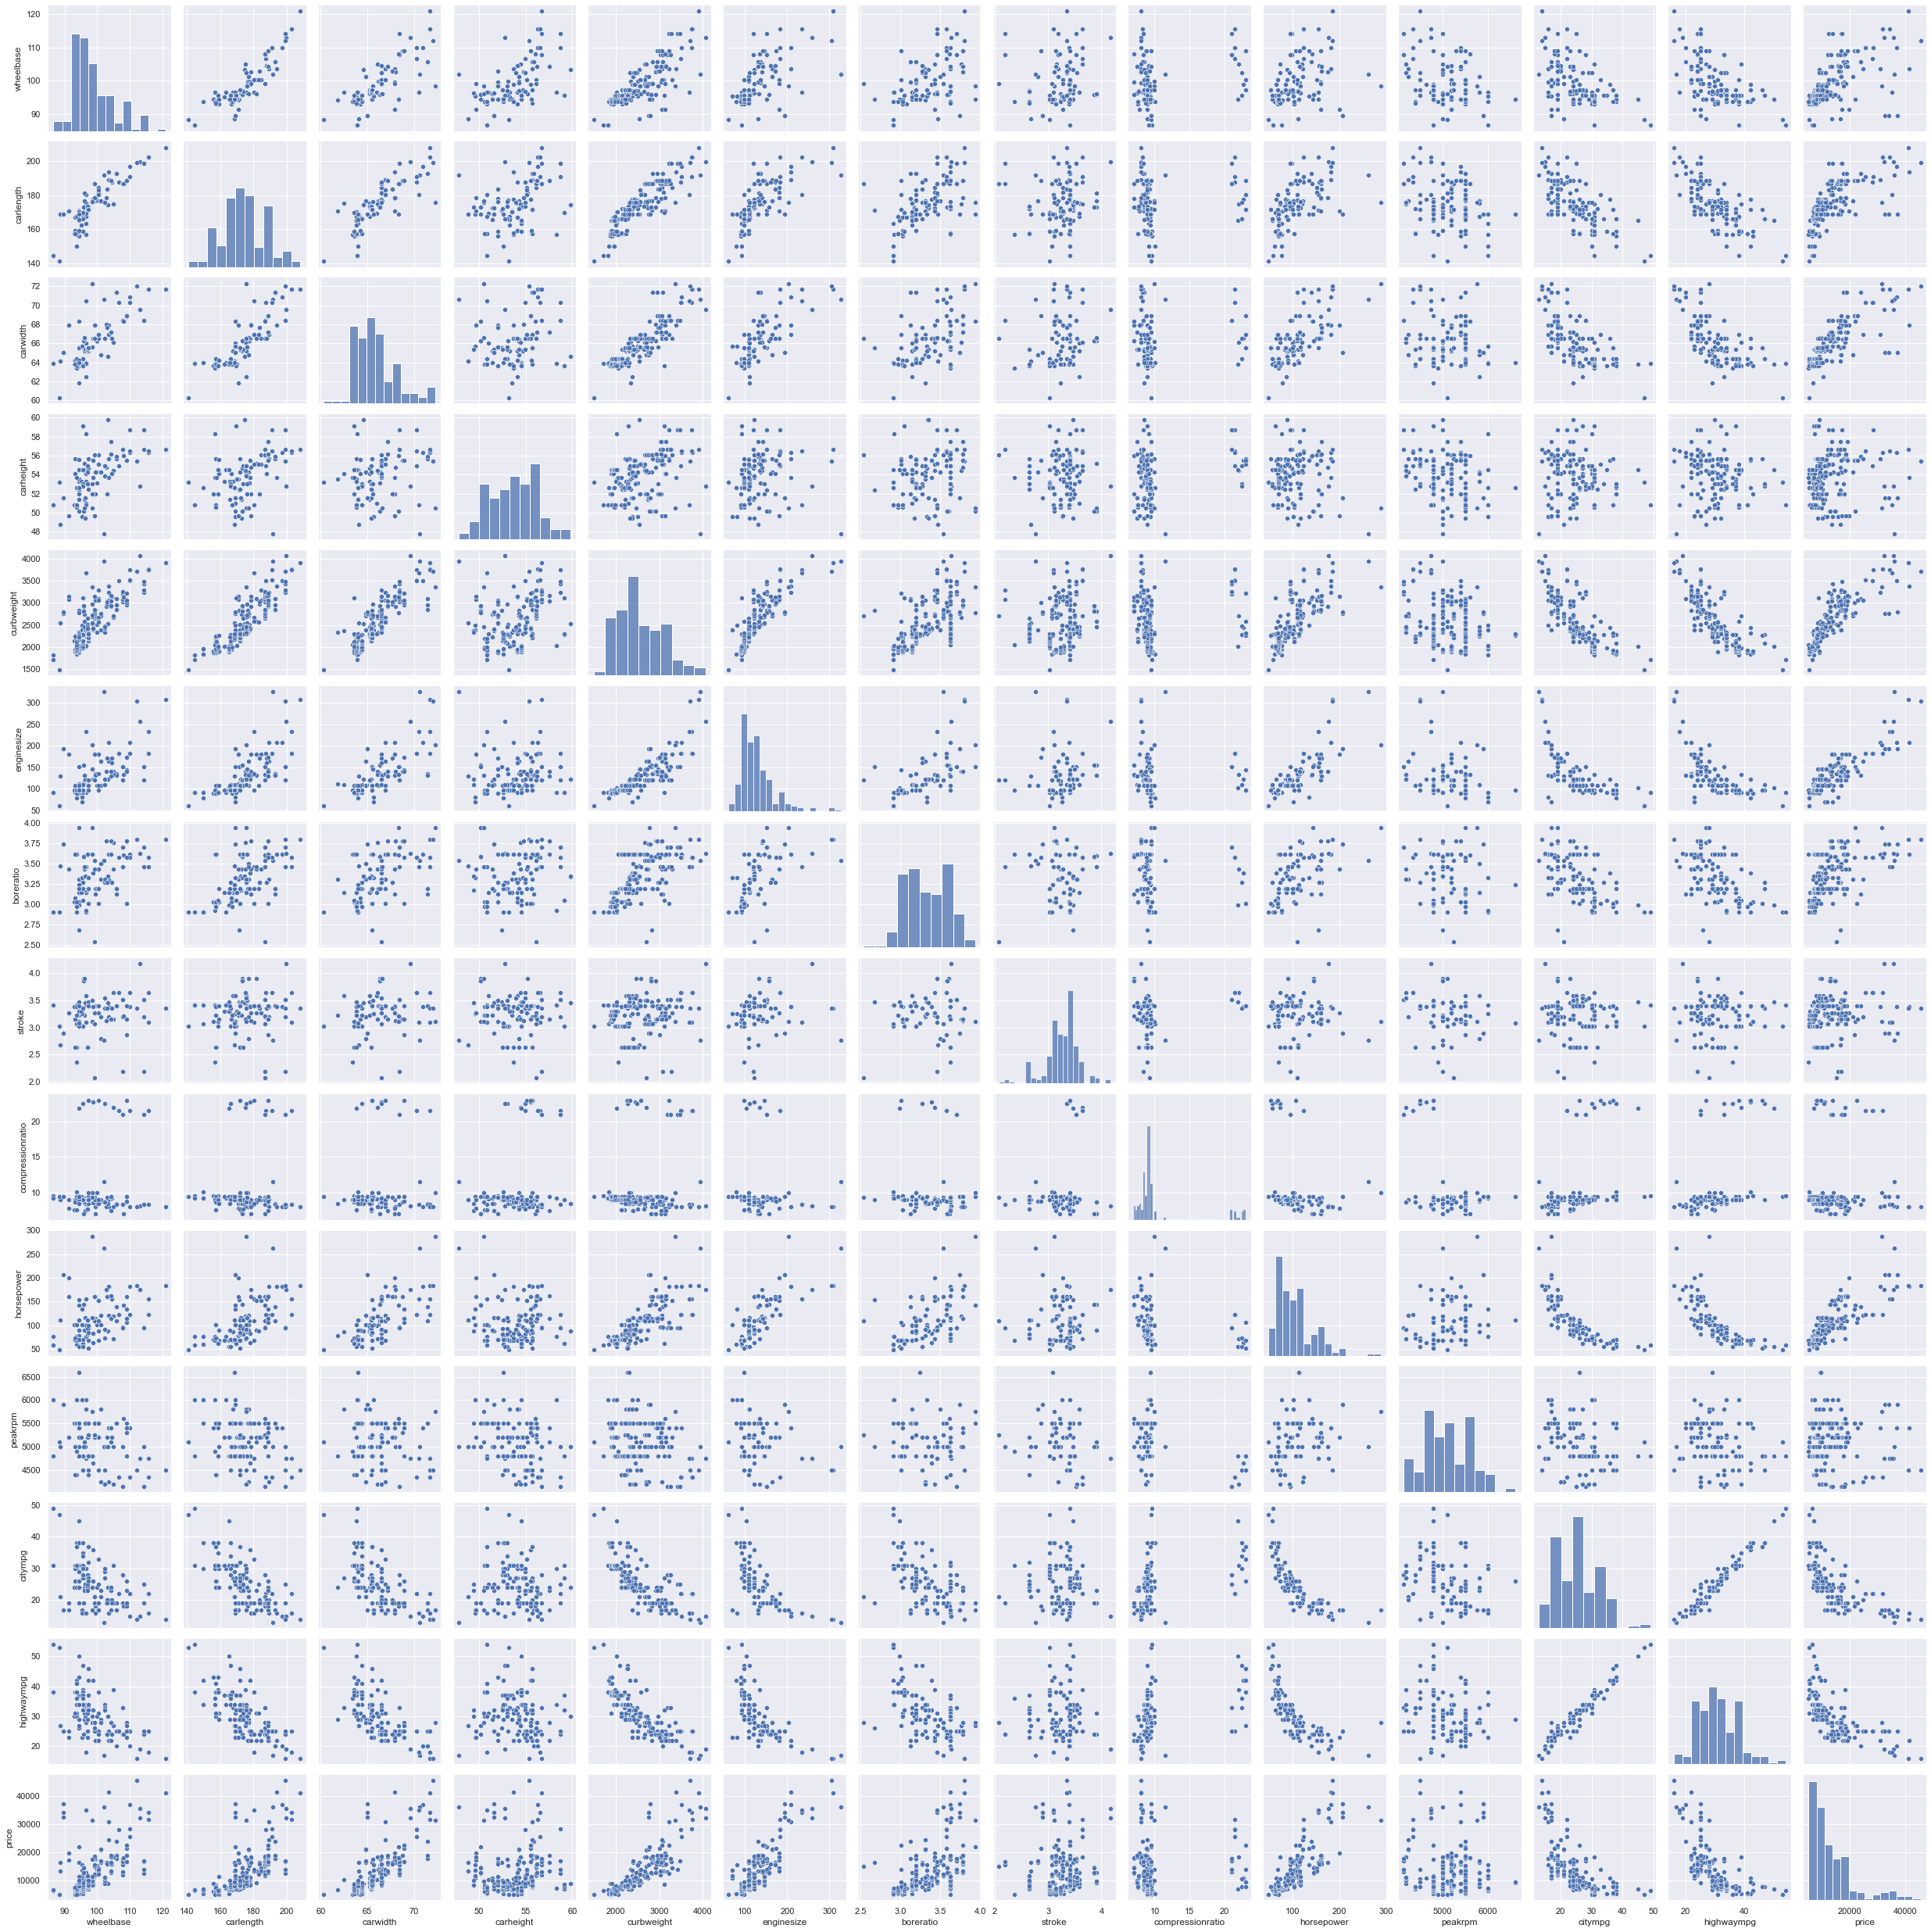

In [89]:
sns.pairplot(num_col)

1.carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
2.carheight doesn't show any significant trend with price.
3.citympg , highwaympg - seem to have a significant negative correlation with price.

#Visualising Categorical Variables
Boxplot of all the categorical variables

In [94]:
cate_col.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'CarCompany'],
      dtype='object')

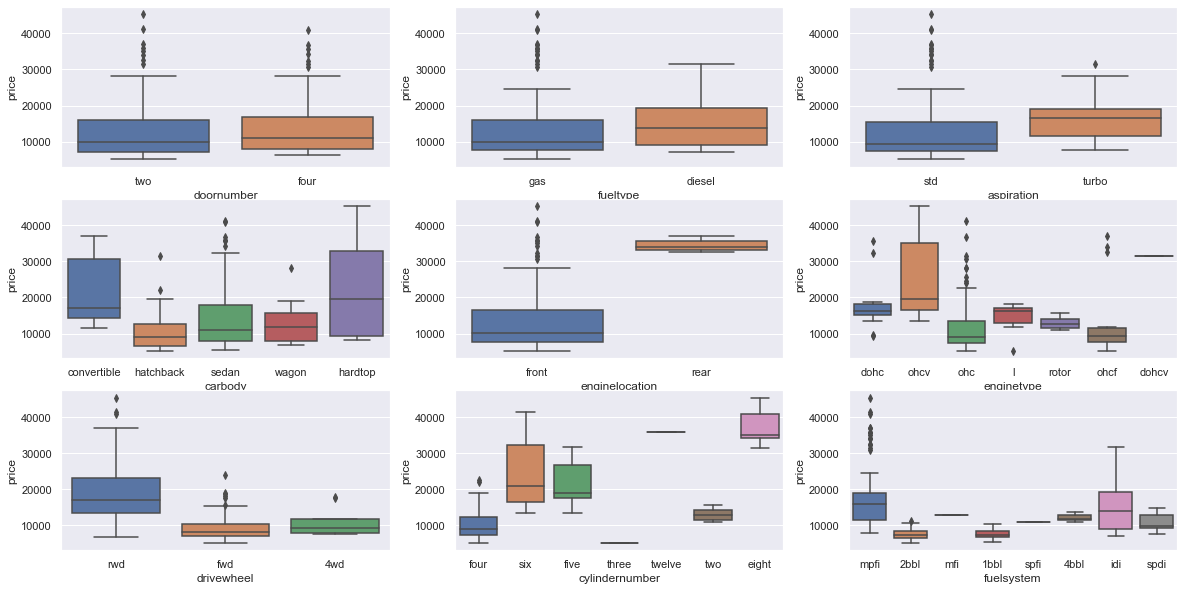

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=df,x='doornumber',y='price')
plt.subplot(3,3,2)
sns.boxplot(data=df,x='fueltype',y='price')
plt.subplot(3,3,3)
sns.boxplot(data=df,x='aspiration',y='price')
plt.subplot(3,3,4)
sns.boxplot(data=df,x='carbody',y='price')
plt.subplot(3,3,5)
sns.boxplot(data=df,x='enginelocation',y='price')
plt.subplot(3,3,6)
sns.boxplot(data=df,x='enginetype',y='price')
plt.subplot(3,3,7)
sns.boxplot(data=df,x='drivewheel',y='price')
plt.subplot(3,3,8)
sns.boxplot(data=df,x='cylindernumber',y='price')
plt.subplot(3,3,9)
sns.boxplot(data=df,x='fuelsystem',y='price')
plt.show()


1.The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
2.All the types of carbody is relatively cheaper as compared to convertible carbody.
3.The cars with rear enginelocation are way expensive than cars with front enginelocation.
4.The price of car is directly proportional to no. of cylinders in most cases.
5.Enginetype ohcv comes into higher price range cars.
6.DoorNumber isn't affecting the price much.
7.HigerEnd cars seems to have rwd drivewheel

Text(0.5, 1.0, 'Fueltype')

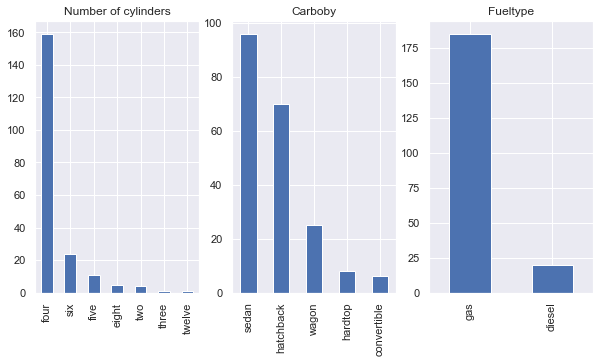

In [98]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt.subplot(1,3,2)
df['carbody'].value_counts().plot(kind='bar')
plt.title('Carboby')
plt.subplot(1,3,3)
df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fueltype')

1.The number of cylinders used in most cars is four.
2.Number of Gas fueled cars are way more than diesel fueled cars.
3.Sedan is the most prefered car type.

Relationship between fuelsystem vs price with hue fueltype

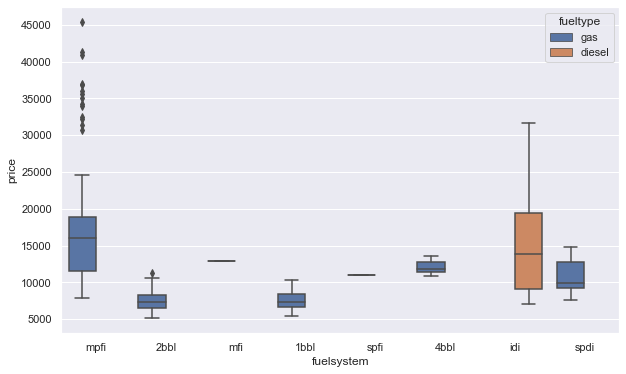

In [99]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

Relationship between carbody and price having hue as enginelocation'

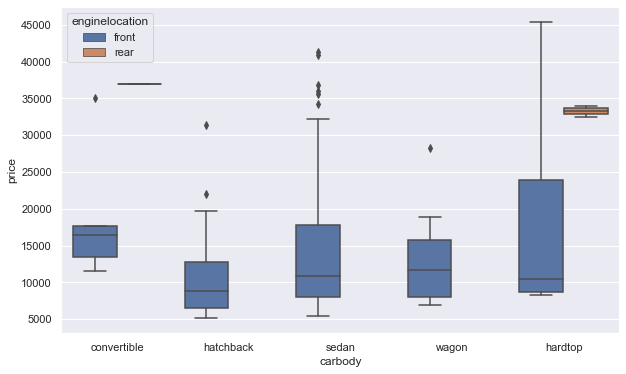

In [101]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

Relationship between cylindernumber vs price with hue fueltype

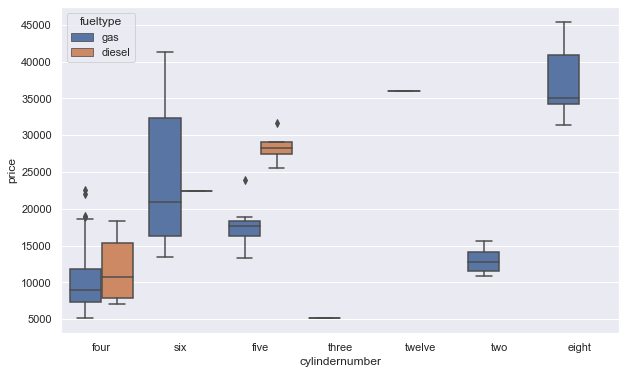

In [102]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

carcompany vs average price distribution

In [105]:
df1= pd.DataFrame(df.groupby('CarCompany')['price'].mean().sort_values(ascending=False))

In [113]:
df1.reset_index(inplace=True)

In [114]:
df1

,CarCompany,price
0,jaguar,34600.000000
1,buick,33647.000000
2,porsche,31400.500000
3,bmw,26118.750000
4,volvo,18063.181818
5,audi,17859.166714
6,mercury,16503.000000
7,alfa-romero,15498.333333
8,peugeot,15489.090909
9,saab,15223.333333


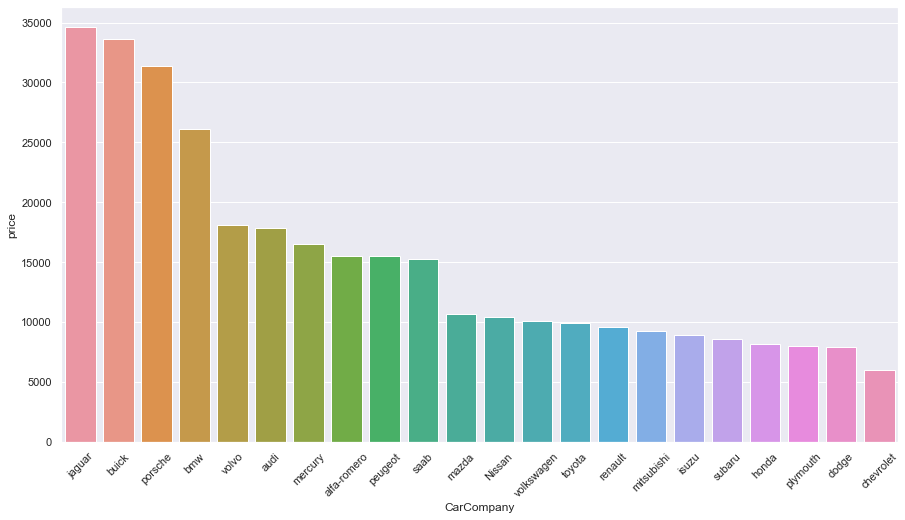

In [116]:
sns.barplot(x=df1['CarCompany'],y=df1['price'])
plt.xticks(rotation=45)
plt.show()

Jaguar,Buick and porsche seems to have the highest average price.

In [132]:
df['price'] = df['price'].astype(int)

In [137]:
def carrange(x):
    if x>0 and x<= 10000:
        return ('Budget_Friendly')
    elif x>10000 and x<= 20000:
        return('Medium_Range')
    else:
        return('TopNotch_Cars')
df['CarCategory'] = df['price'].apply(carrange)

In [140]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarCategory
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium_Range
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium_Range
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium_Range
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,Medium_Range
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,Medium_Range


#carbody vs average price distribution

In [120]:
df2 = pd.DataFrame(df.groupby('carbody')['price'].mean().sort_values(ascending=False))

In [121]:
df2.reset_index(inplace=True)

C:\Users\Shikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbody', ylabel='price'>

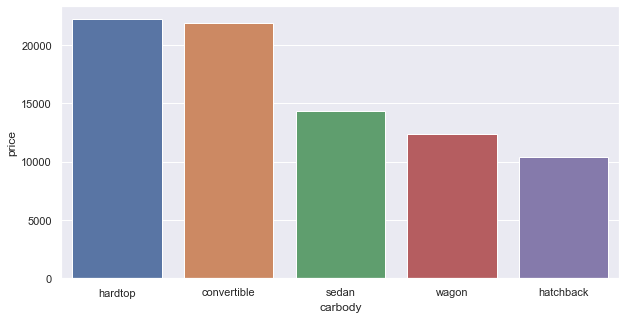

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(df2['carbody'],y=df2['price'])

hardtop and convertible seems to have the highest average price.

In [141]:
#significant variables after visualization
sig_col = ['price','CarCategory','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [142]:
df_auto = df[sig_col]

In [143]:
df_auto.sample()

,price,CarCategory,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
134,15040,Medium_Range,ohc,gas,std,hatchback,four,fwd,99.1,2707,121,2.54,110,21,28,186.6,66.5


# Data Preparation

#Dummy Variables
The variable carbody has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called dummy variables.

In [144]:
s_cat_col = df_auto.select_dtypes(include=['object'])

In [145]:
s_cat_col.columns

Index(['CarCategory', 'enginetype', 'fueltype', 'aspiration', 'carbody',
       'cylindernumber', 'drivewheel'],
      dtype='object')

In [148]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dv = pd.get_dummies(s_cat_col,drop_first=True)

In [149]:
dv.shape

(205, 22)

In [150]:
df_auto = pd.concat([df_auto,dv],axis=1)

In [ ]:
df_auto = df_auto.drop(s_cat_col.columns,axis=1)

In [161]:
df_auto.shape

(205, 32)

# Training the data into train test split

In [162]:
df_auto.head(3)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,0,0,1,0,0,0,0,1


In [163]:
X = df_auto.drop('price',axis=1)
y=df_auto['price']

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [165]:
X_train.shape

(143, 31)

In [166]:
X_test.shape

(62, 31)

In [168]:
y_train.shape

(143,)

In [169]:
y_test.shape

(62,)

#Rescaling the Features
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [171]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [172]:
s_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

In [174]:
X_train = sc_x.fit_transform(X_train[s_num_col])

In [176]:
import warnings
warnings.filterwarnings("ignore")

In [177]:
X_test = sc_x.transform(X_test[s_num_col])

In [190]:
y_train = y_train.values.reshape(-1,1)

In [192]:
y_train = sc_y.fit_transform(y_train)

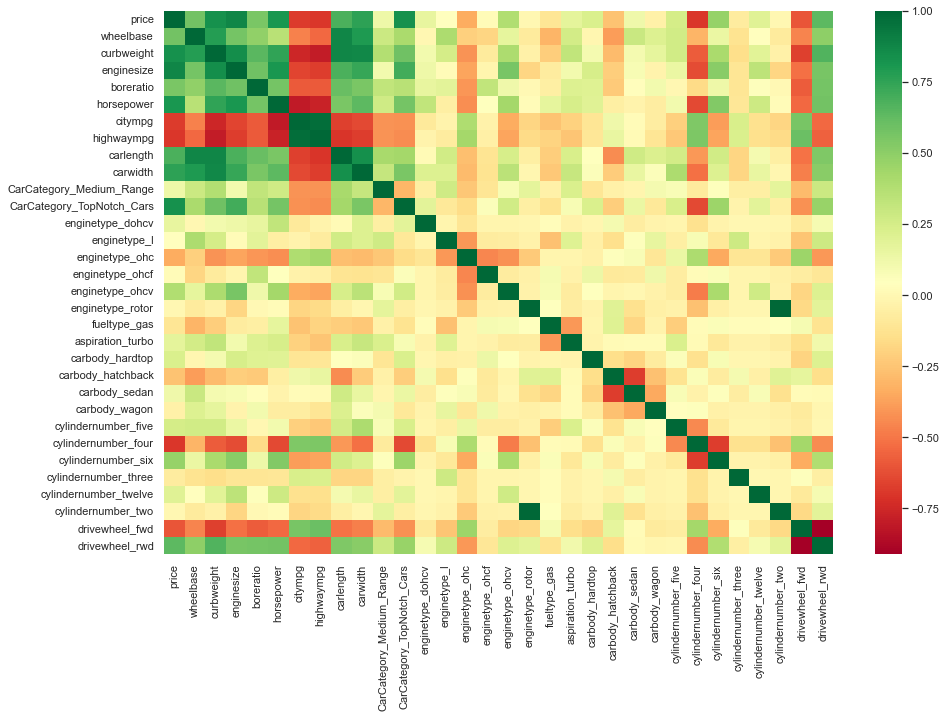

In [193]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(15,10))
sns.heatmap(df_auto.corr(),cmap="RdYlGn")
plt.show()

# Linear Regression

In [194]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lpred = sc_y.inverse_transform(lr.predict(X_test))
print(r2_score(y_test,lpred))

0.7649810675943851


# Decision Tree Regressor

In [195]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
dpred = sc_y.inverse_transform(lr.predict(X_test))
print(r2_score(y_test,dpred))



0.7649810675943851


In [203]:
from sklearn.ensemble import RandomForestRegressor
Rt = RandomForestRegressor(n_estimators = 15,criterion = 'mse',random_state = 20)
Rt.fit(X_train,y_train)



RandomForestRegressor(criterion='mse', n_estimators=15, random_state=20)

In [214]:
Rtpred = sc_y.inverse_transform(np.array(Rf.predict(X_test)).reshape(-1,1))

In [216]:
print(r2_score(y_test,Rtpred))

0.9358196316836033


We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
As we can see random forest performing best (with accuracy ~ 0.93)